### 1. Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [4]:
file_path = 'C:/Users/lourd/A6_Open Project/Data Sets//frpp_data_subset_cleaned.xlsx'

In [6]:
df = pd.read_excel(file_path)

### 2. Data Cleaning

In [9]:
# Display the first few rows and column names to understand the data structure
df.head(), df.columns

(   Latitude  Longitude Real Property Type Real Property Use Utilization  \
 0  34.24330  -79.79580           Building      Laboratories    Utilized   
 1  32.82920  -83.73550           Building      Laboratories    Utilized   
 2  41.84585  -87.67311           Building            Office    Utilized   
 3  28.02150  -81.73050           Building      Laboratories    Utilized   
 4  35.27560  -81.14500           Building      Laboratories    Utilized   
 
    Utilization Code          Asset Status Asset Status Code  Building Age  \
 0                 6  Current Mission Need                 A            60   
 1                 6  Current Mission Need                 A            60   
 2                 6  Current Mission Need                 A            60   
 3                 6  Current Mission Need                 A            60   
 4                 6  Current Mission Need                 A            60   
 
    Number of Federal Employees  \
 0                           23   
 1

In [11]:
# Selecting numeric variables for correlation analysis
numeric_df = df[['Building Age', 'Number of Federal Employees',
                 'Owned and Otherwise Managed Annual Operations Cost',
                 'Owned and Otherwise Managed Annual Maintenance Cost',
                 'Square Feet (Buildings)']]


In [13]:
# Converting cost columns to numeric 
numeric_df['Owned and Otherwise Managed Annual Operations Cost'] = pd.to_numeric(numeric_df['Owned and Otherwise Managed Annual Operations Cost'], errors='coerce')
numeric_df['Owned and Otherwise Managed Annual Maintenance Cost'] = pd.to_numeric(numeric_df['Owned and Otherwise Managed Annual Maintenance Cost'], errors='coerce')

C:\Users\lourd\AppData\Local\Temp\ipykernel_128492\324291624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['Owned and Otherwise Managed Annual Operations Cost'] = pd.to_numeric(numeric_df['Owned and Otherwise Managed Annual Operations Cost'], errors='coerce')
C:\Users\lourd\AppData\Local\Temp\ipykernel_128492\324291624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['Owned and Otherwise Managed Annual Maintenance Cost'] = pd.to_numeric(numeric_df['Owned and Otherwise Managed 

In [15]:
# Dropping rows with NaN values resulting from conversion issues
numeric_df.dropna(inplace=True)

C:\Users\lourd\AppData\Local\Temp\ipykernel_128492\1480904086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.dropna(inplace=True)


### 3. Exploring Relationships

In [18]:
# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

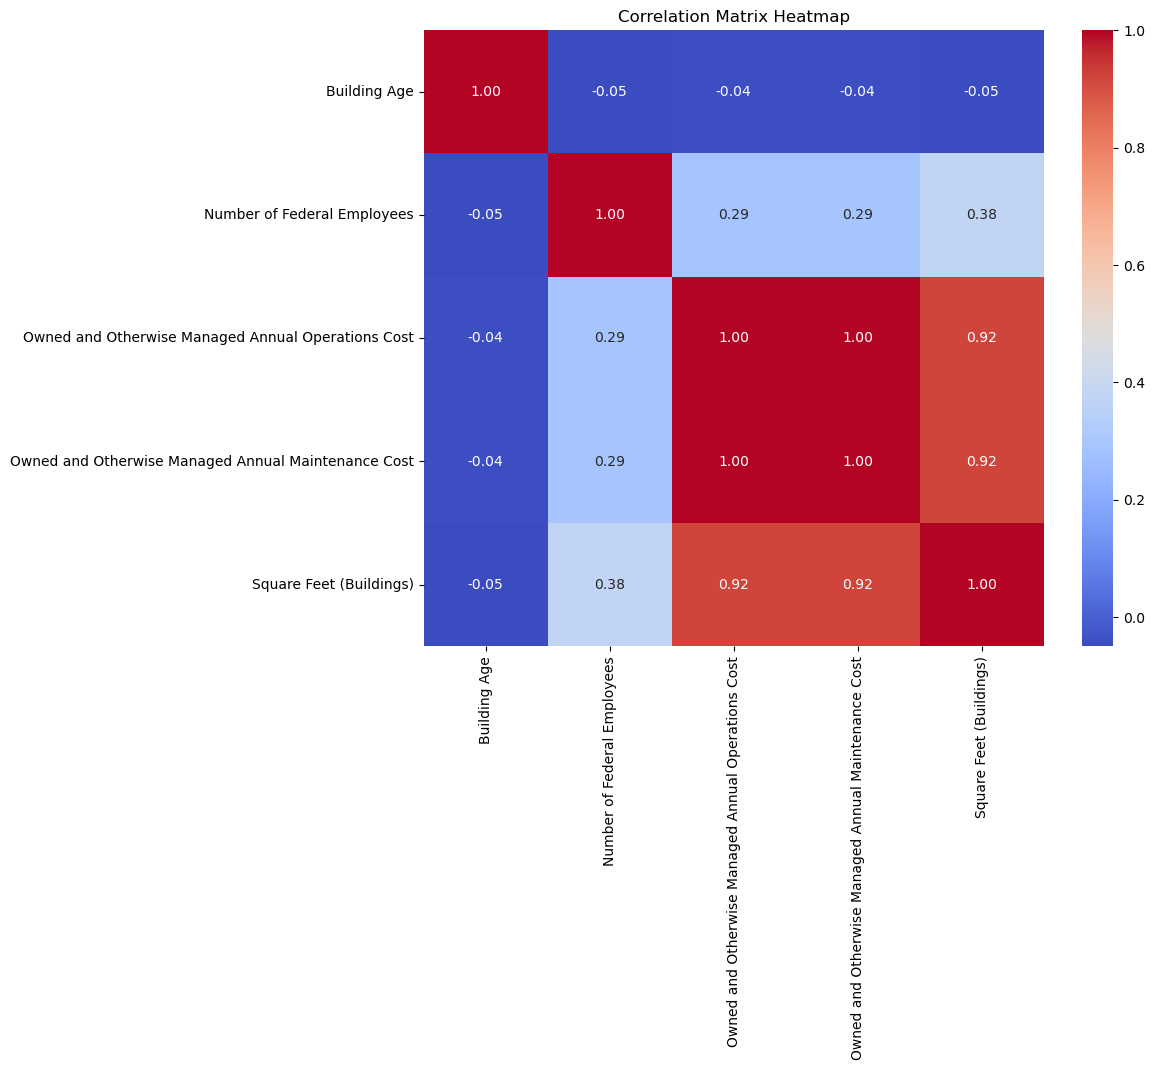

In [20]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


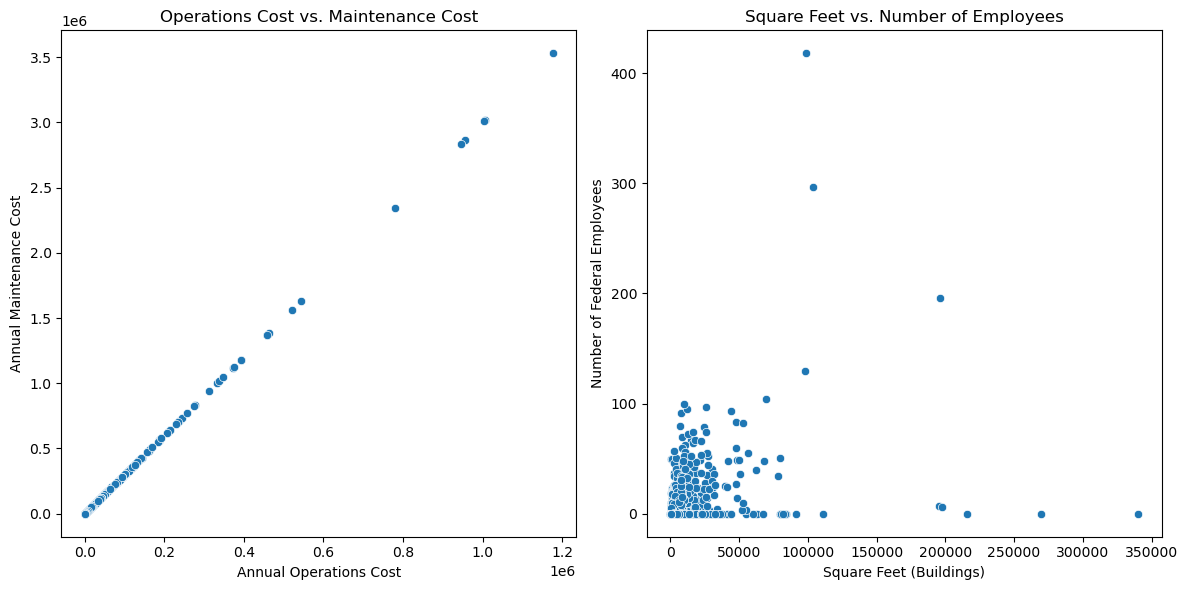

In [22]:
# Scatterplot for Operations cost vs. Maintenance cost and Square Feet vs. Number of Employees
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=numeric_df['Owned and Otherwise Managed Annual Operations Cost'],
                y=numeric_df['Owned and Otherwise Managed Annual Maintenance Cost'])
plt.title('Operations Cost vs. Maintenance Cost')
plt.xlabel('Annual Operations Cost')
plt.ylabel('Annual Maintenance Cost')

plt.subplot(1, 2, 2)
sns.scatterplot(x=numeric_df['Square Feet (Buildings)'],
                y=numeric_df['Number of Federal Employees'])
plt.title('Square Feet vs. Number of Employees')
plt.xlabel('Square Feet (Buildings)')
plt.ylabel('Number of Federal Employees')

plt.tight_layout()
plt.show()


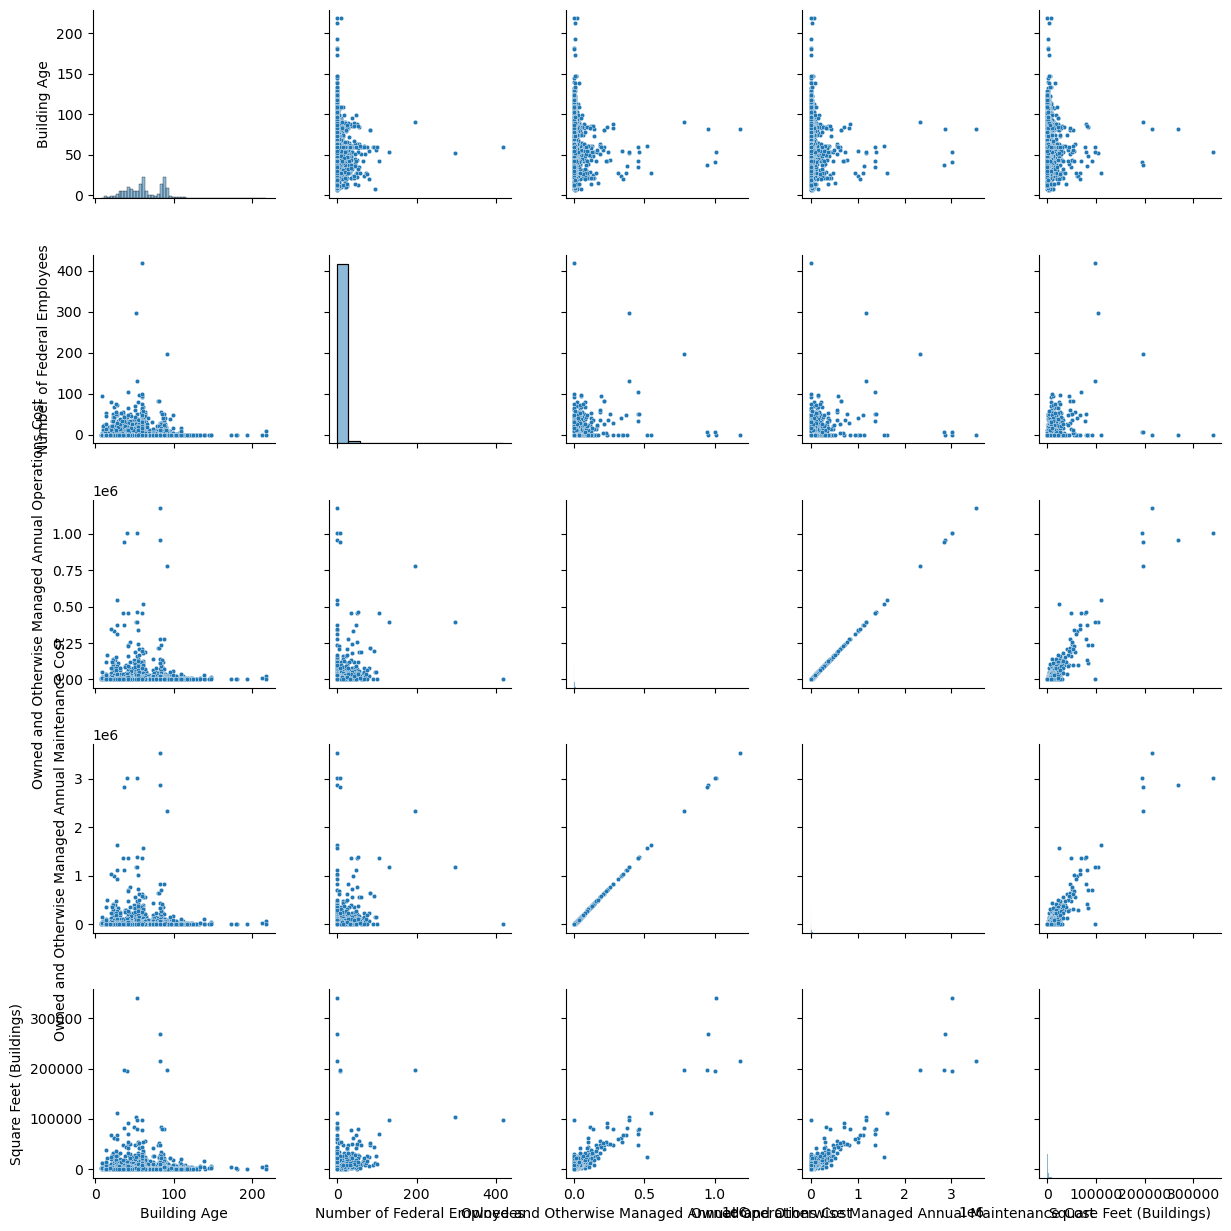

In [24]:
# Creating a pair plot for the dataset
sns.pairplot(numeric_df, plot_kws={'s': 10}, diag_kws={'alpha': 0.5})
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()


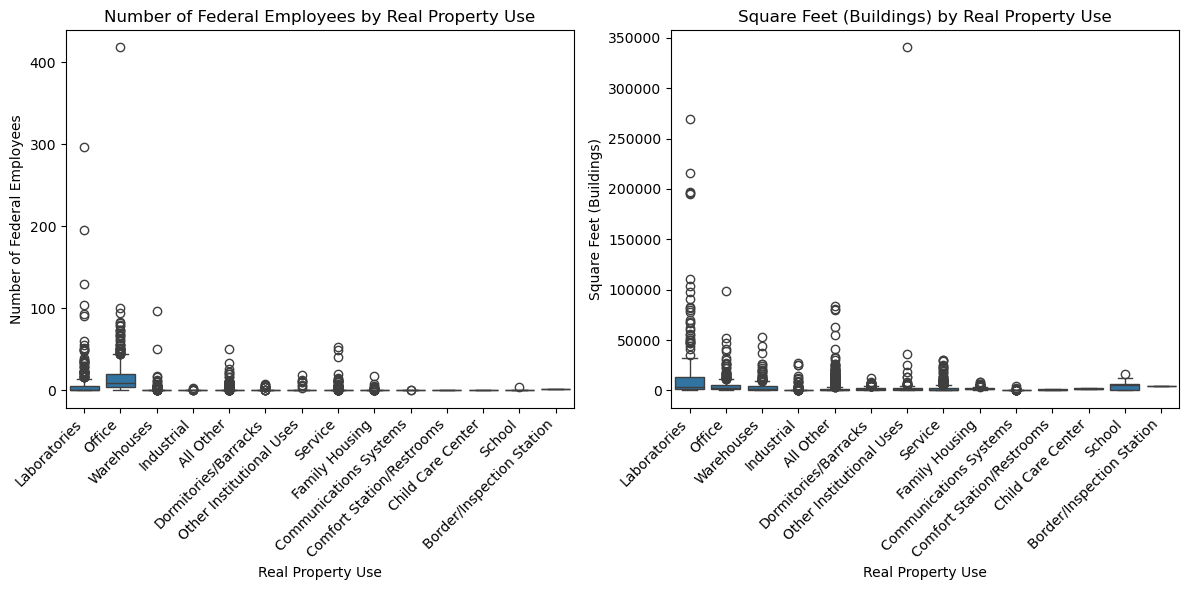

In [26]:
# Creating a box plot for the Number of Federal Employees and Square Feet (Buildings) by Real Property Use
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Real Property Use', y='Number of Federal Employees', data=df)
plt.title('Number of Federal Employees by Real Property Use')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.boxplot(x='Real Property Use', y='Square Feet (Buildings)', data=df)
plt.title('Square Feet (Buildings) by Real Property Use')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
